https://alexkaiser.dev/2020-06-25-k-Nearest-Neighbors-in-Python-from-Scratch/

In [1]:
# Import packages

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, classification_report

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataFrame = pd.read_csv("heart.csv")

dummie_sex = pd.get_dummies(dataFrame.Sex)
dummie_EA = pd.get_dummies(dataFrame.ExerciseAngina)
dummie_CP = pd.get_dummies(dataFrame.ChestPainType)
dummie_RECG = pd.get_dummies(dataFrame.RestingECG)
dummie_STS = pd.get_dummies(dataFrame.ST_Slope)


#Merging dummy variables
merged_dataFrame = pd.concat([dataFrame,dummie_sex,dummie_EA,dummie_CP,dummie_RECG,dummie_STS],axis=1)
pd.set_option('display.max_columns', None)
#merged_dataFrame.head()


#dropping the categorical columns
final_dataFrame = merged_dataFrame.drop(['Sex','ExerciseAngina','ChestPainType','RestingECG','ST_Slope'], axis=1)
pd.set_option('display.max_columns', None)
final_dataFrame.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [4]:
df_knn = final_dataFrame.copy()

In [5]:
Y = df_knn.HeartDisease.values # Y is now a numpy array
X = df_knn.drop(['HeartDisease'],axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [11]:
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'F',
       'M', 'N', 'Y', 'ASY', 'ATA', 'NAP', 'TA', 'LVH', 'Normal', 'ST', 'Down',
       'Flat', 'Up'],
      dtype='object')

In [7]:
X_train_cv, X_test_cv, Y_train_cv, Y_test_cv = train_test_split(X, Y, train_size = 0.8, random_state = 42)

In [8]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_cv)
scaled_X_train_cv = scaler.transform(X_train_cv)
scaled_X_test_cv = scaler.transform(X_test_cv)

In [23]:
scaled_X_train_cv = pd.DataFrame(scaled_X_train_cv, columns = X.columns)
scaled_X_train_cv['HeartDisease']=Y_train_cv.tolist()

In [9]:
# Class
class k_nearest_neighbors:
    """Class of the K Nearest Neighbors Algorithm implementation"""

    """
    **Implementation**
    Method:
    - euclidean_distance(a, b):
        Returns euclidian distance of values
    - fit_knn(X_train, y_train):
        Fits model to training data
    - predict_knn(X):
        Returns predictions for X based on fitted model
    - display_knn(x)
        Returns list of nearest_neighbors + corresponding euclidian distance
    """

    # Initialization
    def __init__(self, n_neighbors=5):  # default neighbors to be returned
        """Init for algorithm"""
        self.n_neighbors = n_neighbors

    # Euclidian Distance
    def euclidean_distance(self, a, b):
        """
        Returns euclidian distance of values between row a and row b
        Inputs: a : int or float
                b : int or float
        Output: euclidian_distance : float
        """
        eucl_distance = 0.0  # initializing eucl_distance at 0

        for index in range(len(a)):
            """
            Based on: https://en.wikipedia.org/wiki/Euclidean_distance#:~:text=In%20mathematics%2C%20the%20Euclidean%20distance,metric%20as%20the%20Pythagorean%20metric.
            Calculation: Subtract b from a, square difference,
            add to eucl_distance.
            """
            eucl_distance += (a[index] - b[index]) ** 2

            euclidian_distance = np.sqrt(eucl_distance)

        return euclidian_distance

    # Fit k Nearest Neighbors
    def fit_knn(self, X_train, y_train):
        """
        Fits model to training data
        Inputs: X_train : array of int or float
                y_train : list or array of target
        Output: N/A pass along to predict_knn
        NOTE: I specifically choose not to include a "build-in"
        data split function, as it allows more flexibility in choosing
        data split methods according preference and/or data problem.
        """
        self.X_train = X_train
        self.y_train = y_train

    # Predict X for kNN
    def predict_knn(self, X):
        """
        Returns predictions for X based on fitted X_train and y_train data
        Inputs: X : list or array
        Output: prediction_knn : list of floats for each vector in X
        """

        # initialize prediction_knn as empty list
        prediction_knn = []

        # # initialize euclidian_distances as empty list
        # euclidian_distances = []

        for index in range(len(X)):  # Main loop iterating through len(X)

            # initialize euclidian_distances as empty list
            euclidian_distances = []

            for row in self.X_train:
                # for every row in X_train, find eucl_distance to X using
                # euclidean_distance() and append to euclidian_distances list
                eucl_distance = self.euclidean_distance(row, X[index])
                euclidian_distances.append(eucl_distance)

            # sort euclidian_distances in ascending order, and retain only k
            # neighbors as specified in n_neighbors (n_neighbors = k)
            neighbors = np.array(euclidian_distances).argsort()[: self.n_neighbors]

            # initialize dict to count class occurrences in y_train
            count_neighbors = {}

            for val in neighbors:
                if self.y_train[val] in count_neighbors:
                    count_neighbors[self.y_train[val]] += 1
                else:
                    count_neighbors[self.y_train[val]] = 1

            # max count labels to prediction_knn
            prediction_knn.append(max(count_neighbors, key=count_neighbors.get))

        return prediction_knn

    # Print/display list of nearest_neighbors + corresponding euclidian
    # distance
    def display_knn(self, x):
        """
        Inputs: x : vector x
        Output: display_knn_values : returns a list containing nearest
        neighbors and their correscponding euclidian distances
        to the vector x wrapped in tuples
        """

        # initialize euclidian_distances as empty list
        euclidian_distances = []

        # for every row in X_train, find eucl_distance to x
        # using euclidean_distance() and append to euclidian_distances list
        for row in self.X_train:
            eucl_distance = self.euclidean_distance(row, x)
            euclidian_distances.append(eucl_distance)

        # sort euclidian_distances in ascending order, and retain only k
        # neighbors as specified in n_neighbors (n_neighbors = k)
        neighbors = np.array(euclidian_distances).argsort()[: self.n_neighbors]

        # initiate empty display_knn_values list
        display_knn_values = []

        for index in range(len(neighbors)):
            neighbor_index = neighbors[index]
            e_distances = euclidian_distances[index]
            display_knn_values.append(
                (neighbor_index, e_distances)
            )  # changed to list of tuples
        # print(display_knn_values)
        return display_knn_values

In [18]:
type(scaled_X_train_cv)

pandas.core.frame.DataFrame

In [24]:
classifier = k_nearest_neighbors(n_neighbors=5)
skf = StratifiedKFold(n_splits=4)

In [26]:
def train_model(train, test, fold_no):
    X = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'F',
       'M', 'N', 'Y', 'ASY', 'ATA', 'NAP', 'TA', 'LVH', 'Normal', 'ST', 'Down',
       'Flat', 'Up']
    y = ['HeartDisease']
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    classifier.fit_knn(train,y_train)
    predictions = classifier.predict_knn(X_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions))


fold_no = 1

for train_index, test_index in skf.split(scaled_X_train_cv, Y_train_cv):
    train = scaled_X_train_cv.iloc[train_index,:]
    test = scaled_X_train_cv.iloc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1

KeyError: 0

In [33]:
scores = []

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
  
for train_index, test_index in skf.split(X_train_cv, Y_train_cv):
    x_train_fold, x_validation_fold = scaled_X_train_cv[train_index], scaled_X_train_cv[test_index]
    y_train_fold, y_validation_fold = Y_train_cv[train_index], Y_train_cv[test_index]
    
    classifier.fit_knn(x_train_fold, y_train_fold)
    predict = classifier.predict_knn(x_validation_fold)
    scores = accuracy_score(y_validation_fold, predict)
    scores.append(score)
    print('Validation Accuracy: %.2f', score*100)

ValueError: max() arg is an empty sequence

In [5]:
#first split the test dataset from the main dataset, here the train dataset is 60%  
#the rest 40% of the dataset is divided into test&validation set to (50%-50%)  

X_train, X_test_val, Y_train, Y_test_val = train_test_split(X_, Y_, train_size = 0.6, random_state = 42)
X_test, X_validation, Y_test, Y_validation = train_test_split(X_test_val, Y_test_val, test_size = 0.5, random_state = 42)

In [6]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

### Finding K

In [12]:
val_err_dict = {}          #test errors for the validation dataset

for k in range(1,30):
    # Instantiate model
    classifier = k_nearest_neighbors(n_neighbors=k)
    # Fit
    classifier.fit_knn(X_train, Y_train)
    # Prediction
    predict = classifier.predict_knn(X_validation)
    # Accuracy Score
    print(f"Build k_nearest_neighbors model accuracy: {accuracy_score(Y_validation, predict)}")
    test_error = 1 - accuracy_score(Y_validation,predict)
    val_err_dict[k] = test_error

Build k_nearest_neighbors model accuracy: 0.8315217391304348
Build k_nearest_neighbors model accuracy: 0.8315217391304348
Build k_nearest_neighbors model accuracy: 0.842391304347826
Build k_nearest_neighbors model accuracy: 0.8478260869565217
Build k_nearest_neighbors model accuracy: 0.8532608695652174
Build k_nearest_neighbors model accuracy: 0.8315217391304348
Build k_nearest_neighbors model accuracy: 0.8532608695652174
Build k_nearest_neighbors model accuracy: 0.8586956521739131
Build k_nearest_neighbors model accuracy: 0.8641304347826086
Build k_nearest_neighbors model accuracy: 0.875
Build k_nearest_neighbors model accuracy: 0.8586956521739131
Build k_nearest_neighbors model accuracy: 0.8858695652173914
Build k_nearest_neighbors model accuracy: 0.8586956521739131
Build k_nearest_neighbors model accuracy: 0.8695652173913043
Build k_nearest_neighbors model accuracy: 0.875
Build k_nearest_neighbors model accuracy: 0.8804347826086957
Build k_nearest_neighbors model accuracy: 0.8804347

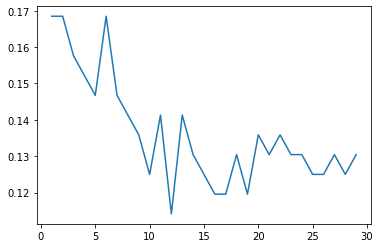

In [13]:
plt.plot(*zip(*sorted(val_err_dict.items())))
plt.show()

In [24]:
type(kfold)

generator

In [ ]:

for k, (t, v) in enumerate(kfold):
    
    classifier = k_nearest_neighbors(n_neighbors=k)
    classifier.fit_knn(X_train[t], Y_train[t])
    predict = classifier.predict_knn(X_validation[v])
    scores = accuracy_score(Y_validation[v], predict)
    scores.append(score)
    print('Fold: %2d, Validation Accuracy: %.2f' % (k+1, score*100))
    
return scores

In [9]:
# report results
accuracy = accuracy_score(Y_validation, predict)
tn, fp, fn, tp = confusion_matrix(Y_validation, predict).ravel()
precision = precision_score(Y_validation, predict)
recall = recall_score(Y_validation, predict)
f1 = f1_score(Y_validation, predict)

In [10]:
print("Test set accuracy: %.2f" %(accuracy*100))
print("Confusion matrix: \n", 
      "True Positive: %s \t False Positive: %s \n" %(tp, fp), 
      "False Negative: %s \t True Negative: %s" %(fn, tn))
print("Test set precision score: %.2f" %(precision*100))
print("Test set recall score: %.2f" %(recall*100))
print("Test set F1 score: %.2f" %(f1*100))

Test set accuracy: 86.41
Confusion matrix: 
 True Positive: 94 	 False Positive: 11 
 False Negative: 14 	 True Negative: 65
Test set precision score: 89.52
Test set recall score: 87.04
Test set F1 score: 88.26


In [ ]:
#Euclidean Distance
def euclidean_distance(p,q): 
    return np.sqrt(np.sum((p-q)**2))

In [ ]:
#Importing the required modules
from scipy import stats

#Function to calculate KNN
def knn(X_train, Y_train , X_test, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in X_test: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(X_train)): 
            distances = euclidean_distance(np.array(X_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = Y_train[dist]
         
        #Majority voting
        lab = stats.mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels